In [1]:
#Install tensorflow
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 47kB/s 
     |████████████████████████████████| 501kB 47.3MB/s 
     |████████████████████████████████| 4.3MB 42.1MB/s 


In [2]:
#Install mlxtend for plotting
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 3.3MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
#Necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout

In [4]:
#Check the tensorflow version
print(tf.__version__)

2.0.0-rc0


In [0]:
#Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
#load the inbuilt dataset
from tensorflow.keras.datasets import cifar10

In [7]:
#Loading the data will result in 2 Tuples containing Training and Test Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
#Store the label names in a variable
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
class_name

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [10]:
#the pixel values of the data will be ranging from 0 to 255
x_train.max()

255

In [0]:
#We need the maximum value to be 1
#So we will divide x_train and x_test by 255
x_train=x_train/255
x_test=x_test/255

In [12]:
#Check the shape of dataset
x_train.shape
#We have 50000 images in training dataset

(50000, 32, 32, 3)

In [13]:
#We have 10000 images for test dataset
x_test.shape

(10000, 32, 32, 3)

[3]


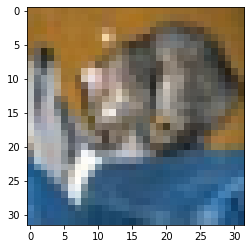

In [15]:
#View an image
plt.imshow(x_test[0])

In [16]:
#Print its label
print(y_test[0])
#This is a bird

[3]


In [0]:
#Build CNN Model
model=Sequential()

#Add the layers
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

#Add the layers
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))

#Add Pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

#Add Dropout
#purpose of dropout is to avoid overfitting
#Here we are dropping 50% of inputs
model.add(Dropout(0.5))


#If we still want to increase the layers
#model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
#model.add(Dropout(0.5))


#Add Flatten layer
model.add(Flatten())

#Add Dense Layer
#units: hoow many neirons we want
model.add(Dense(units=128,activation='relu'))

#Output Layer
#We cannot use Sigmoid activation function as it predicts binary output
model.add(Dense(units=10,activation='softmax'))

In [20]:
#View model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [0]:
#Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [22]:
#FIt the model
history=model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(x_test,y_test))
#Here Validation accuracy less than training accuracy which means our model is overfitting
#If validation accuracy is more than training accuracy,our model is underfitting

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 213s 4ms/sample - loss: 1.3602 - sparse_categorical_accuracy: 0.5118 - val_loss: 1.1206 - val_sparse_categorical_accuracy: 0.5998
Epoch 2/10
50000/50000 [==============================] - 215s 4ms/sample - loss: 1.0544 - sparse_categorical_accuracy: 0.6275 - val_loss: 0.9771 - val_sparse_categorical_accuracy: 0.6575
Epoch 3/10
50000/50000 [==============================] - 216s 4ms/sample - loss: 0.9261 - sparse_categorical_accuracy: 0.6744 - val_loss: 0.9180 - val_sparse_categorical_accuracy: 0.6709
Epoch 4/10
50000/50000 [==============================] - 215s 4ms/sample - loss: 0.8372 - sparse_categorical_accuracy: 0.7056 - val_loss: 0.9016 - val_sparse_categorical_accuracy: 0.6848
Epoch 5/10
50000/50000 [==============================] - 215s 4ms/sample - loss: 0.7609 - sparse_categorical_accuracy: 0.7320 - val_loss: 0.8950 - val_sparse_categorical_accuracy: 0.6887
Epoch 6/10

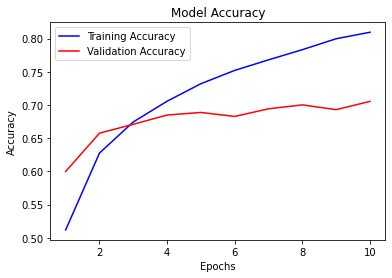

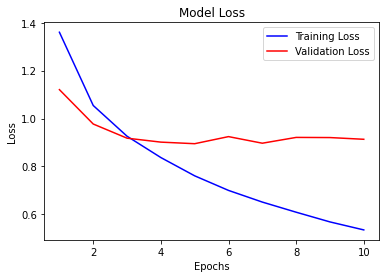

In [24]:
#Plot training and validation accuracy
epoch_range=range(1,11)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'],color='blue')
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'],color='red')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'],loc='upper left')
plt.show()

#Model started overfitting after 3rd epoch

#Plot Training and Validation Loss
plt.plot(epoch_range,history.history['loss'],color='blue')
plt.plot(epoch_range,history.history['val_loss'],color='red')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'],loc='upper right')
plt.show()

In [0]:
#plot confusion Matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred=model.predict_classes(x_test)

In [27]:
#Check the predicted values
y_pred

array([3, 8, 1, ..., 5, 1, 7])

In [28]:
#Check the actual values
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
mat=confusion_matrix(y_test,y_pred)

In [33]:
mat

array([[755,  19,  60,  27,  26,   8,  11,   9,  49,  36],
       [ 25, 854,   1,  13,   3,   3,  10,   3,  10,  78],
       [ 52,   9, 538,  78,  95,  96,  81,  31,  13,   7],
       [ 21,  11,  54, 512,  72, 212,  62,  34,   8,  14],
       [ 19,   3,  62,  60, 678,  55,  52,  60,   8,   3],
       [ 11,   6,  36, 165,  55, 663,  14,  43,   3,   4],
       [  3,   6,  35,  69,  47,  50, 780,   4,   4,   2],
       [ 11,   5,  24,  41,  68,  78,  10, 749,   1,  13],
       [ 88,  54,  20,  21,   6,  10,   9,   4, 756,  32],
       [ 37, 106,   5,  20,  10,   9,   6,  25,  13, 769]])

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f862bef9208>)

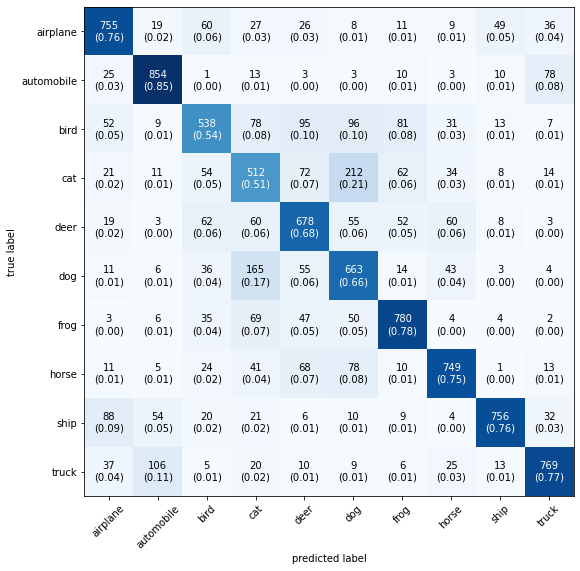

In [36]:
plot_confusion_matrix(mat,figsize=(9,9),class_names=class_name,show_normed=True)